**Milestones 1 to 4**

In [2]:
#importing necessary packages
import numpy as np # used for dataframing
import pandas as pd
import matplotlib.pyplot as plt #matplotlib is used for generating required plotting and visualizing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef #packages for evaluation of metrics
from sklearn.metrics import confusion_matrix #useful to print confusion_matrix
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

In [3]:
data = pd.read_csv("/content/sample_data/creditcard_DataSet.csv")

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247

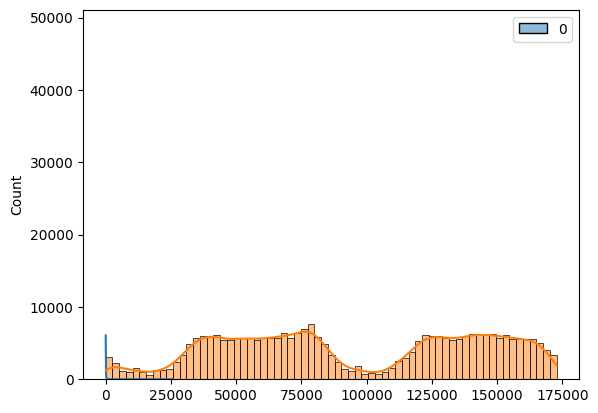

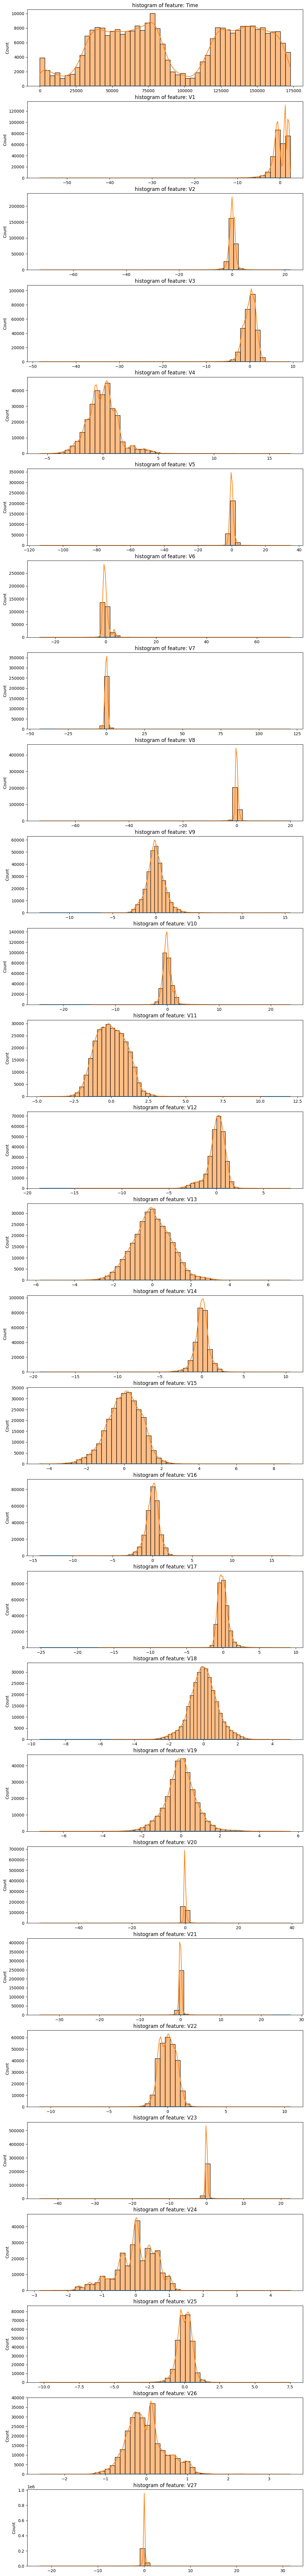

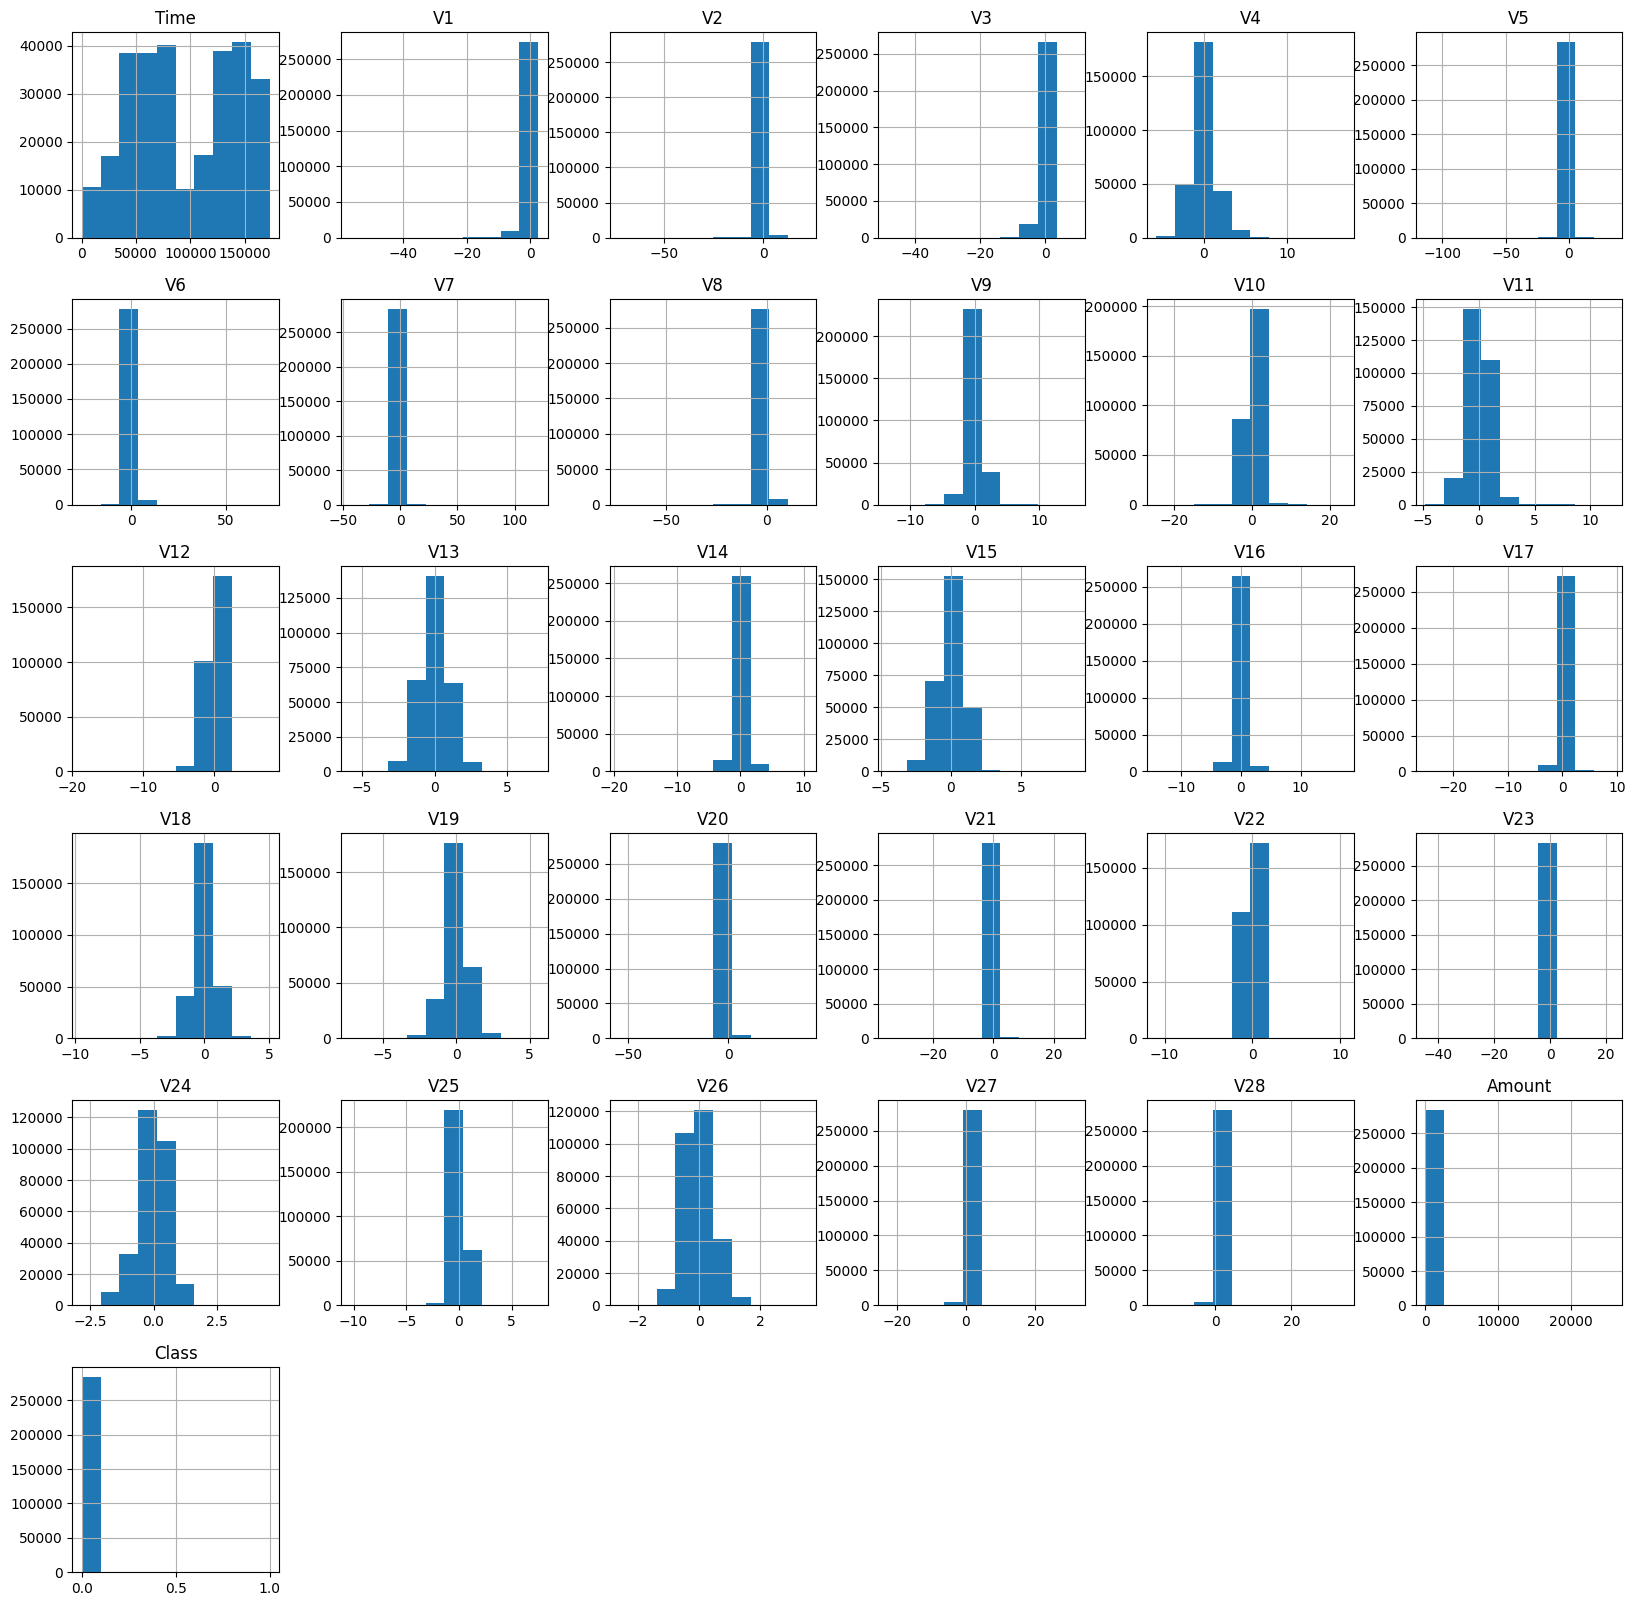

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315
Amount details of fraudulent transaction
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
Amount details of valid transaction
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


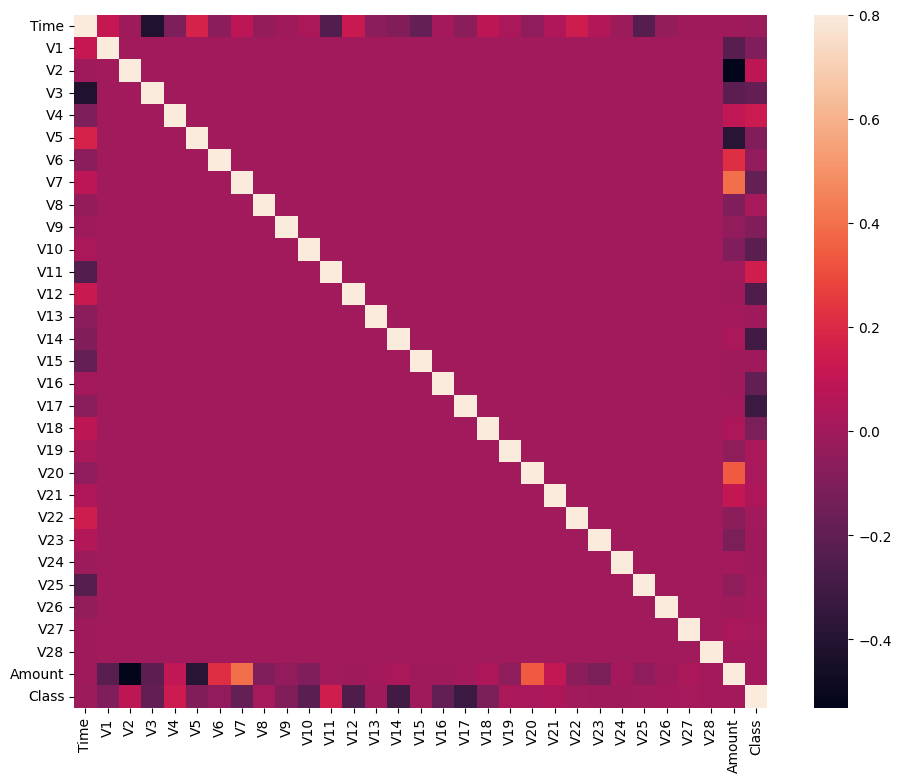

(284807, 30)
(284807,)
The model used is Random Forest classifier
The accuracy is 0.9992802219023208
The precision is 0.8481012658227848
The recall is 0.6979166666666666
The F1-Score is 0.7657142857142857
The Matthews correlation coefficient is 0.7690054205898712


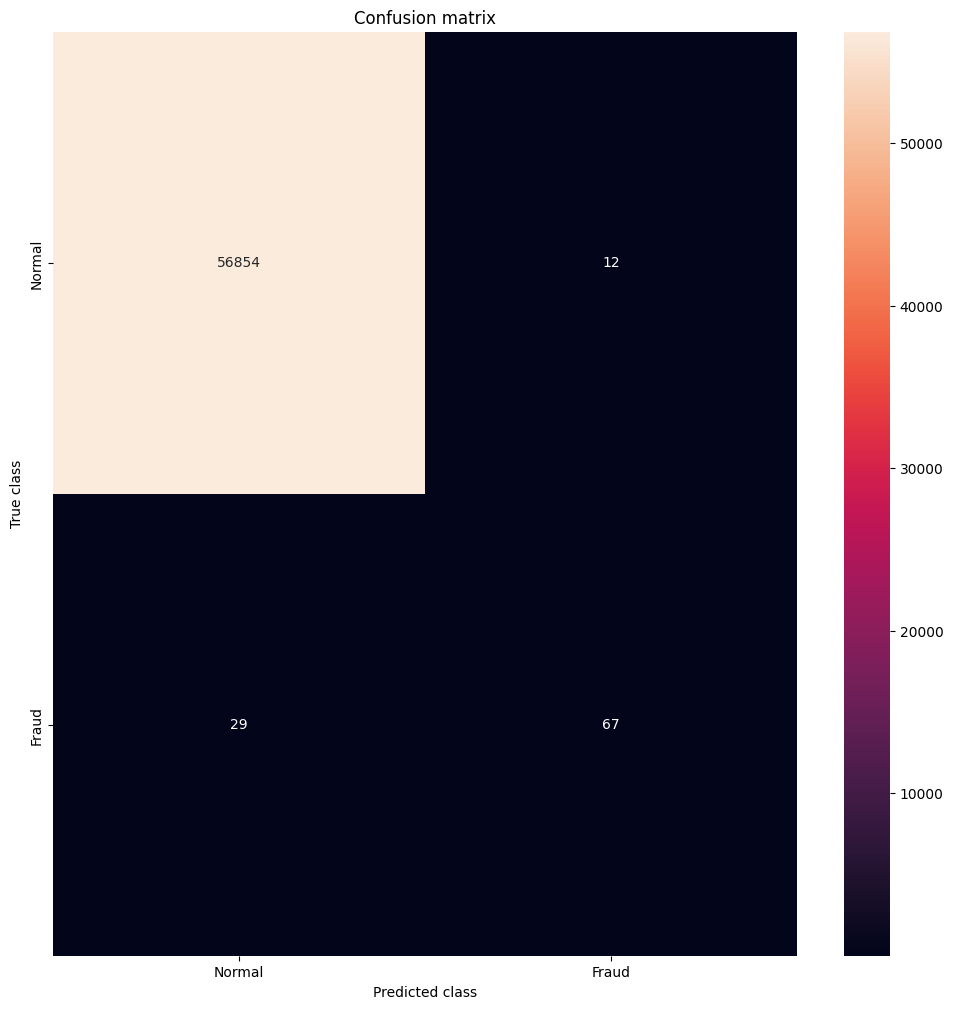

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

In [12]:

print(data.columns)
print(data.head())
print(data.shape)
print(data.describe())

amount = [data['Amount'].values]
sns.histplot(amount, kde=True)

time = data['Time'].values
sns.histplot(time, kde=True)

features = data.iloc[:, 0:28].columns

plt.figure(figsize=(12, 28 * 4))
gs = plt.GridSpec(28, 1)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.histplot(data[c][data.Class == 1], bins=50, kde=True)
    sns.histplot(data[c][data.Class == 0], bins=50, kde=True)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

data.hist(figsize=(20, 20))
plt.show()

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Transactions: {}'.format(len(Valid)))

print("Amount details of fraudulent transaction")
print(Fraud.Amount.describe())

print("Amount details of valid transaction")
print(Valid.Amount.describe())

corrmat = data.corr()
fig = plt.figure(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

X = data.drop(['Class'], axis=1)
Y = data["Class"]

print(X.shape)
print(Y.shape)

X_data = X.values
Y_data = Y.values

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=100)

rfc = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=100)
rfc.fit(X_train, Y_train)

y_pred = rfc.predict(X_test)

n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()

print("The model used is Random Forest classifier")
acc = accuracy_score(Y_test, y_pred)
print("The accuracy is {}".format(acc))
prec = precision_score(Y_test, y_pred)
print("The precision is {}".format(prec))
rec = recall_score(Y_test, y_pred)
print("The recall is {}".format(rec))
f1 = f1_score(Y_test, y_pred)
print("The F1-Score is {}".format(f1))
MCC = matthews_corrcoef(Y_test, y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

plt.figure(figsize=(9, 7))